## ENRICHMENT OF ALL SNPS IN PEAKS USING NULL SETS
1. Find target traits and other traits with similar amount of SNPs to use as controls

In [1]:
home='/frazer01/home/paola/Family1070/private_output/Enrichment_annotations/GWAS'
setwd(home)

In [2]:
outdir = "/projects/CARDIPS/analysis/gwas_enrichment_in_peaks/gregor_5" ####  

In [3]:
library (stringr)

In [88]:
#gwas<-read.csv('/home/paola/Annotations/GWAS_SNPs/GwasCatalog2016.06.12_mod.csv')
gwas<-read.csv('gwas_catalog_v1.0.1-associations_e90_r2017-10-10_mod.txt', header=T, sep="\t")
gwas=subset(gwas, gwas$SNP_ID_CURRENT!="rs")

trait_list<-read.csv("TraitList.csv" ) ### change because I mised one trait (qrr,qrs)
gwas<-merge(gwas, trait_list, by="MAPPED_TRAIT", all.x=T)
## Important note: the coordinates of gwas are hg38 - do not use them (use rs instead)
unique(gwas$MAPPED_TRAIT[gwas$Electro==T])

[1] <NA>                                          
 [2] atrial fibrillation                           
 [3] Brugada syndrome                              
 [4] cardiac arrhythmia                            
 [5] coronary artery bypass, atrial fibrillation   
 [6] early cardiac repolarization measurement      
 [7] electrocardiography, P wave duration          
 [8] electrocardiography, PR interval              
 [9] electrocardiography, PR segment               
[10] electrocardiography, QT interval              
[11] heart rate                                    
[12] P wave duration                               
[13] PR interval                                   
[14] PR interval, Trypanosoma cruzi seropositivity 
[15] PR segment                                    
[16] QRS amplitude, QRS complex                    
[17] QRS complex                                   
[18] QRS complex, QRS duration                     
[19] QRS duration                                  
[20] QRS duration, Trypanosoma cruzi seropositivity
[21] QT interval                                   
[22] QT interval, Trypanosoma cruzi seropositivity 
[23] resting heart rate                            
[24] RR interval                                   
[25] torsades de pointes, response to drug         
[26] TPE interval measurement                      
2229 Levels:  ...

In [53]:
#head(gwas)

In [54]:
exclude=c('QRS duration, Trypanosoma cruzi seropositivity', 'PR interval, Trypanosoma cruzi seropositivity', 
'QT interval, Trypanosoma cruzi seropositivity', 'coronary artery bypass, atrial fibrillation', 'torsades de pointes, response to drug')
include= unique(gwas$MAPPED_TRAIT[gwas$Electro==T])[!(unique(gwas$MAPPED_TRAIT[gwas$Electro==T]) %in% exclude)]

In [55]:
gwas = gwas[order(gwas$P.VALUE),]

In [92]:
setwd(outdir)

### Find other traits with similar amount of SNPs to use as  controls

In [93]:
setwd("gwas_snps")  

In [58]:
######### 
hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('electrocardiography, P wave duration', 'P wave duration'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"p_wave_duration")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('PR interval', 'electrocardiography, PR interval','PR segment', 'electrocardiography, PR segment'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"pr_interval_segment")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('heart rate', 'RR interval', 'resting heart rate'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"heart_rate")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('QT interval', 'electrocardiography, QT interval'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"qt_interval")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('QRS duration', 'QRS complex', "QRS complex, QRS duration", "QRS amplitude, R wave amplitude", "QRS amplitude, QRS complex"))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"qrs_duration")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('atrial fibrillation'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"atrial_fibrillation")



[1] 20

[1] 52

[1] 175

[1] 156

[1] 80

[1] 73

In [90]:
mean(c(20,52,175,156,107,73))
median(c(20,52,175,156,107,73))

[1] 97.16667

[1] 90

In [69]:
gwas= gwas[!duplicated(gwas[,c('SNP_ID_CURRENT', 'MAPPED_TRAIT')]),]
markers<-aggregate(SNP_ID_CURRENT~MAPPED_TRAIT, gwas, length)
markers<-markers[markers$SNP_ID_CURRENT<=200 & markers$SNP_ID_CURRENT>=45  , ]
dim(markers)

markers= subset(markers, !(MAPPED_TRAIT %in% include))
markers= subset(markers, !(MAPPED_TRAIT %in% ""))

dim(markers)

 markers$TRAIT_NAME= gsub('([[:punct:]])|\\s+','_',markers$MAPPED_TRAIT)

# remove the long names for commodity.
ctls = markers$MAPPED_TRAIT[nchar(markers$TRAIT_NAME)<=50]
ctls_names = markers$TRAIT_NAME[nchar(markers$TRAIT_NAME)<=50]
length(ctls)

l=c(NA)
for (i in 1:length(ctls)){
  hr<-subset(gwas, gwas$MAPPED_TRAIT %in% ctls[i])
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
l[i]<-length(hr_input)
writeLines(hr_input,ctls_names[i])  
}

[1] 189   2

[1] 183   2

[1] 167

In [68]:
mean(l)
median(l)

[1] 90.59281

[1] 75

In [39]:
### separate traits 50-180 SNPs
hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('electrocardiography, P wave duration', 'P wave duration'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"p_wave_duration")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('PR segment', 'PR interval', 'electrocardiography, PR interval' , 'electrocardiography, PR segment'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"pr_interval")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('heart rate', 'RR interval', 'resting heart rate'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"heart_rate")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('QT interval', 'electrocardiography, QT interval'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"qt_interval")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('QRS duration', 'QRS complex'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"qrs_duration")

hr<-subset(gwas, gwas$MAPPED_TRAIT %in% c('atrial fibrillation'))
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
length(hr_input)
writeLines(hr_input,"atrial_fibrillation")

gwas= gwas[!duplicated(gwas[,c('SNP_ID_CURRENT', 'MAPPED_TRAIT')]),]
markers<-aggregate(SNP_ID_CURRENT~MAPPED_TRAIT, gwas, length)
markers<-markers[markers$SNP_ID_CURRENT<180 & markers$SNP_ID_CURRENT>50  , ]
dim(markers)

markers= subset(markers, !(MAPPED_TRAIT %in% include))
markers= subset(markers, !(MAPPED_TRAIT %in% ""))

dim(markers)

 markers$TRAIT_NAME= gsub('([[:punct:]])|\\s+','_',markers$MAPPED_TRAIT)

# remove the long names for commodity.
ctls = markers$MAPPED_TRAIT[nchar(markers$TRAIT_NAME)<=50]
ctls_names = markers$TRAIT_NAME[nchar(markers$TRAIT_NAME)<=50]
length(ctls)

l=c(NA)
for (i in 1:length(ctls)){
  hr<-subset(gwas, gwas$MAPPED_TRAIT %in% ctls[i])
hr_input<-as.character(unique(hr$SNP_ID_CURRENT))
l[i]<-length(hr_input)
writeLines(hr_input,ctls_names[i])  
}

[1] 149   2

### Prepare sh files to lauch the gregor analysis

In [110]:
setwd(outdir)

In [96]:
getwd()

[1] "/frazer01/projects/CARDIPS/analysis/gwas_enrichment_in_peaks/gregor_5"

In [72]:
writeHeader = function(id,
                      folder,
                      ppn        = 1
                       )
{
    
   header = paste("#!/bin/bash",
               "",
               paste("#$ -N ", id, sep = ""),
               paste("#$ -o ", folder, "/", id, ".out", sep = ""),
               paste("#$ -e ", folder, "/", id, ".err", sep = ""),
               "#$ -l week",
               paste("#$ -pe smp", ppn),
               sep = "\n"
              )
   return(header);
}

In [73]:
plink = readLines("plink_commands.txt")

In [74]:
plink_cm = paste(plink, collapse = "\n")

In [75]:
# awk '{print $1,0.5}' gwas_list > input
# sed -i $'1 i\\\nSNP\tP' input

In [111]:
dirs = list.files("gwas_snps/")

In [112]:
options(warn=-1)
for (dir in dirs){
    new_dir = paste("traits", dir, sep="/")
    dir.create(new_dir)
    input= readLines(paste("gwas_snps", dir,sep="/"))  
    input = data.frame(input,0.5)
    colnames(input)=c("SNP", "P")
    write.table(input, paste(new_dir, "input", sep="/"), sep="\t", quote=F , row.names=FALSE)
}
options(warn=0)

In [113]:
greg_list = paste (outdir, "traits", dirs, sep="/")

In [114]:
for( m in 1:length(dirs)){
    analysis_dir = greg_list[m]
    cd           = paste("cd", analysis_dir )
    command   = 'GREGOR.pl --conf ../../conf_file' 
    full_name = paste(dirs[m], "gregor_enrich", sep="_")
    sh_file   = paste(writeHeader (full_name, analysis_dir, ppn = 8),
                      "module load cardips", "module load GREGOR",
					cd,
                    plink_cm, 
                    command,
                    sep = "\n\n")

	output_file = paste('sh_files/', full_name, ".sh", sep = "")
	write (sh_file, file = output_file)
    run = paste ("qsub", output_file)
    system(run)

}

### When it is over, load and plot results

In [4]:
suppressPackageStartupMessages(library(gplots))
library(RColorBrewer)
library(plot3D)

In [5]:
setwd(outdir)
marks = list.files("bedfiles")
marks

[1] "ATAC_CM"                 "ATAC_IPSC"              
 [3] "ATAC_iPSC_CM_super"      "ATAC_iPSC_super"        
 [5] "Fetal_heart_DHS"         "H3K27AC_CM"             
 [7] "H3K27AC_CM_LAC"          "H3K27AC_IPSC"           
 [9] "H3K27ac_iPSC_CM_super"   "H3K27ac_iPSC_super"     
[11] "Left_ventricle_H3K27ac"  "NKX25"                  
[13] "NKX25_LAC"               "NKX25_super"            
[15] "Right_atrium_H3K27ac"    "Right_ventricle_H3K27ac"

In [6]:
marks =c( 'ATAC_IPSC' , 'H3K27AC_IPSC' , 'ATAC_CM',  'NKX25' , 'H3K27AC_CM',
         'Fetal_heart_DHS','Right_atrium_H3K27ac', 'Right_ventricle_H3K27ac')

In [7]:
cardiac = c('ATAC_CM',  'NKX25' , 'H3K27AC_CM','Fetal_heart_DHS','Right_atrium_H3K27ac', 'Right_ventricle_H3K27ac')
ekg = c('atrial_fibrillation','qrs_duration','qt_interval','heart_rate','pr_interval_segment','p_wave_duration')

In [21]:
traits = list.files("gwas_snps/")

In [22]:
#traits = traits[traits!='QRS_complex__QRS_duration']

In [23]:
FC = data.frame()
PV = data.frame()
n= data.frame()
for (mark in marks) {
    for (trait in traits){
        results = read.table( paste("traits", trait, "StatisticSummaryFile.txt", sep="/"), row.names=1,header=T, sep="\t")
        results = results[mark,]
        FC[trait,mark]=results$InBed_Index_SNP/results$ExpectNum_of_InBed_SNP
        PV[trait,mark]=results$PValue  
        nsnps = read.table( paste("traits", trait, "rs_input_snps.txt", sep="/"))
        n[trait,mark]= nrow(nsnps)
    }   
}


In [24]:
N= as.numeric(n[,1])
PV = PV[(N<=160 & N >=50) | rownames(PV) %in% ekg,]
FC = FC[(N<160& N >=50) | rownames(FC) %in% ekg,]
n = n[(N<160& N >=50) | rownames(n) %in% ekg,]


In [25]:
dim(PV)

[1] 125   8

In [26]:
median(n[ekg,1])
median(n[,1])

[1] 64

[1] 77

In [27]:
names_1 = rownames(PV)
names_2 = paste(n[,1],rownames(PV),  sep="_")
names_3 = paste(rownames(PV), n[,1], sep="_")
names_4 = paste(str_replace_all(names_1,"_"," "), " (", n[,1],")", sep="")
names_5 = toupper(names_4)


BH = p.adjust(unlist(PV), method="BH")
BH = matrix(BH, nrow=nrow(PV), ncol=ncol(PV))
colnames(BH)= colnames(PV)
rownames(BH)= rownames(PV) = rownames(FC) =names_2

In [28]:
library(repr)

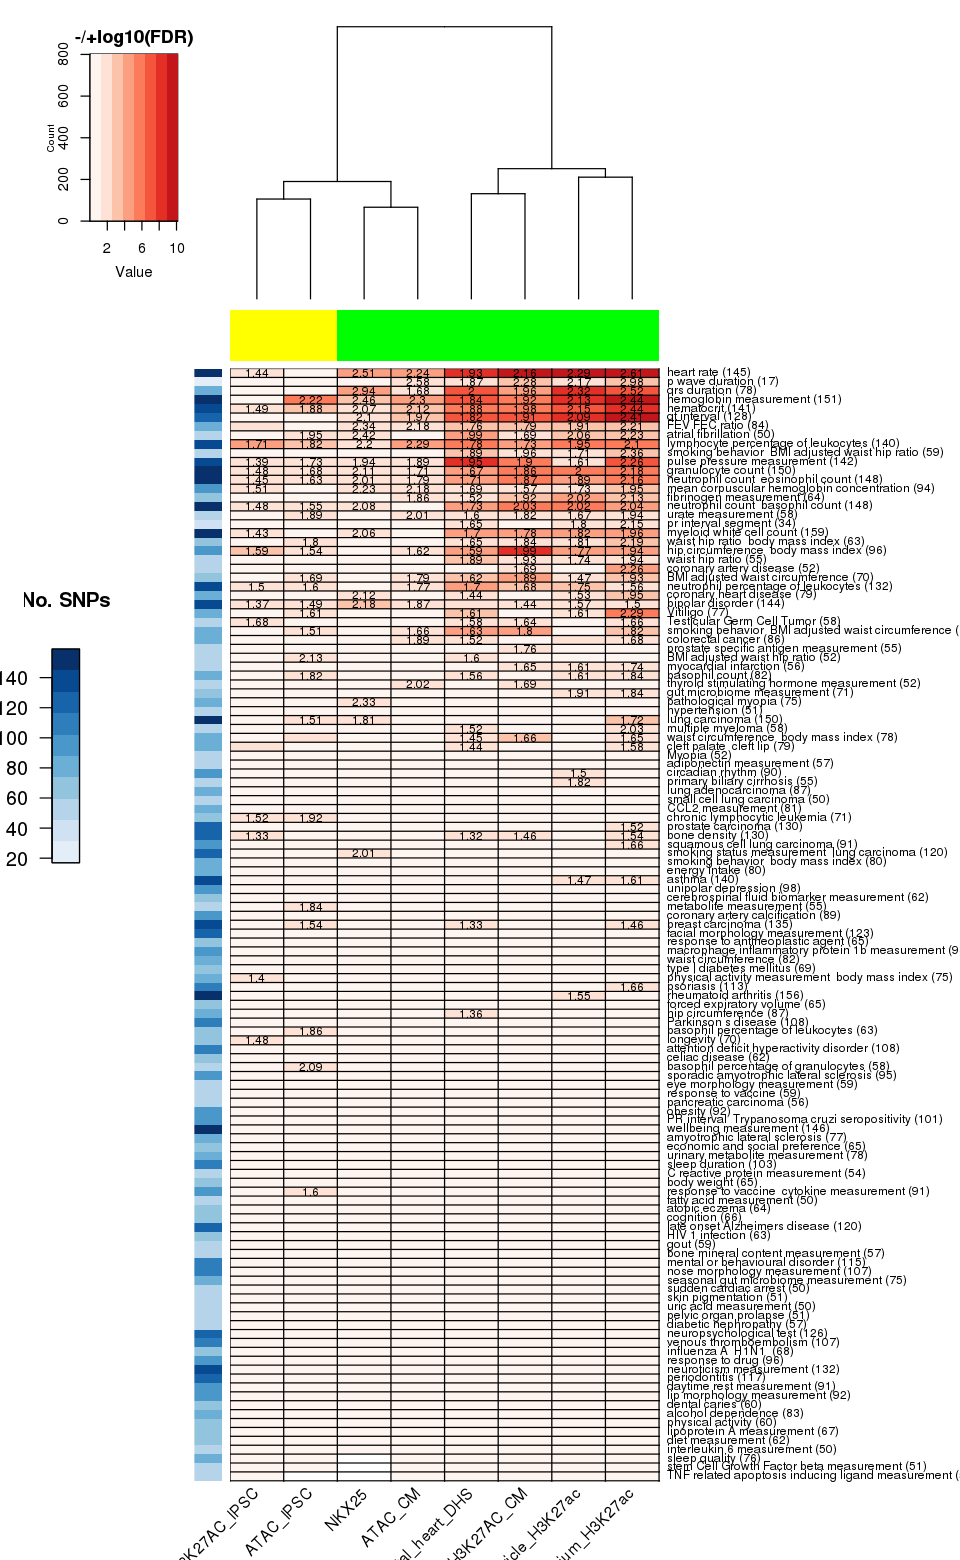

In [38]:
#pdf('/home/paola/Family1070/private_output/Figures/Enrichemnt_GWAS_heatmap.pdf', height=15, width=8)
options(repr.plot.width=8,repr.plot.height=13 )
par(oma=c(1,1,1,1))

m<-as.matrix(-log(BH,10)*(c(-1,1)[(FC>1)+1]))
m<-as.matrix(-log(BH,10))

fc = as.matrix(FC)
foldchange = round(FC,2)
foldchange [m<1.3]<-NA
my_palette <- colorRampPalette(c( "white","orangered3" ))(n = 10)
my_palette =colorRampPalette( rev(brewer.pal(9, "Reds")) )(10)[10:3]  
#my_palette <- colorRampPalette(c("dodgerblue3" ,"white","orangered3" ))(n = 100)

m = m[order(rowMeans(fc[,cardiac]), decreasing=T),]
foldchange = foldchange[order(rowMeans(fc[,cardiac]), decreasing=T),]


#m = m[1:40,]
#foldchange  = foldchange[1:40,]

rowpalette= colorRampPalette( rev(brewer.pal(9, "Blues")) )(11)[10:1] 
x = as.numeric(str_split_fixed(rownames(m), "_", 10)[,1])
rowcol = rowpalette[as.numeric(cut(x,breaks = 10))]

names = names_4[order(rowMeans(fc[,cardiac]), decreasing=T)]
rownames(m)=as.character(names) #[1:40]                    

heatmap.2(m,Colv=T,Rowv=F, srtRow=0, srtCol=45, offsetRow=-0.5, offsetCol=-0.5, dendrogram = 'col',
          keysize=1, margins =c(4,18), trace="none",key.title="-/+log10(FDR)", tracecol=NA,
          col=my_palette, cellnote=foldchange, notecol="black", notecex=0.9,
          sepwidth=c(0.0005,0.0005),sepcolor="black",colsep=0:ncol(m),rowsep=0:nrow(m), cexCol=1.2,cexRow=0.9,
         RowSideColors =rowcol, ColSideColors =c("yellow", "green")[(colnames(m)%in%cardiac)+1])

colkey(rowpalette, clim=range(x, na.rm=T), clab="No. SNPs", add=T, side=2, length=0.2)
#dev.off()

In [39]:
range(x)

[1]  17 159

### Volcano Plot

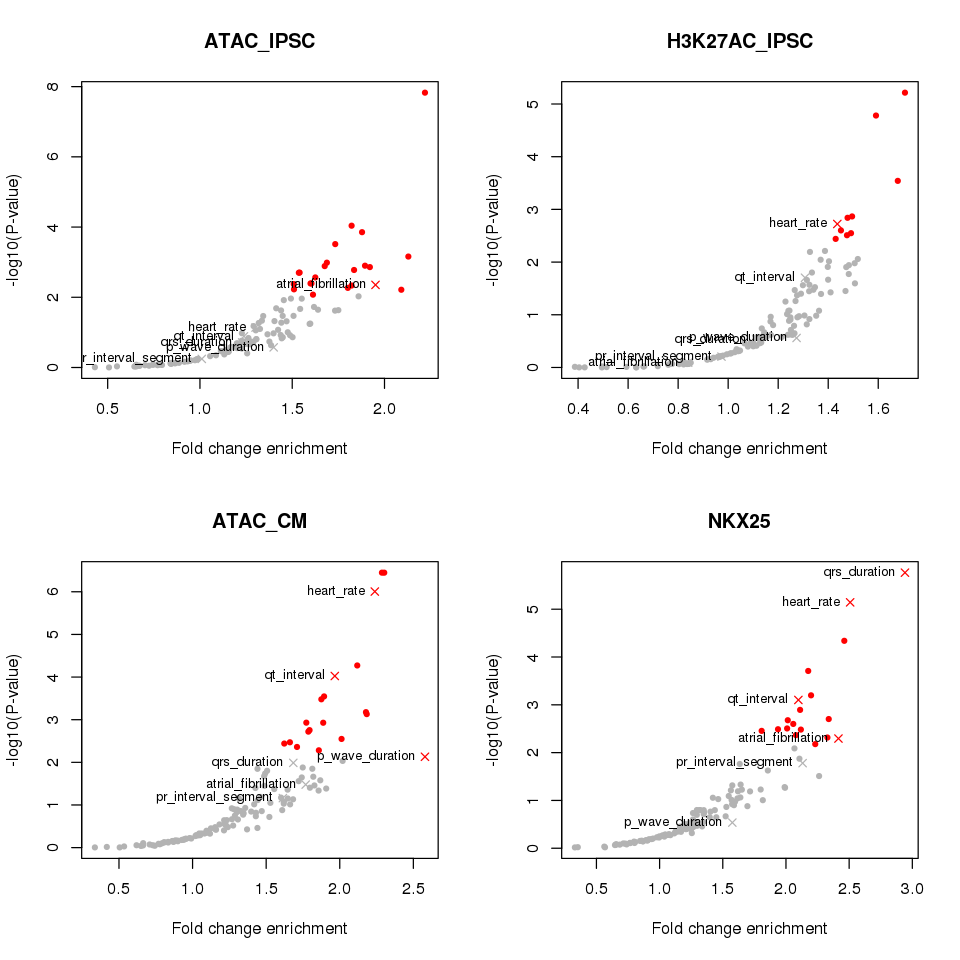

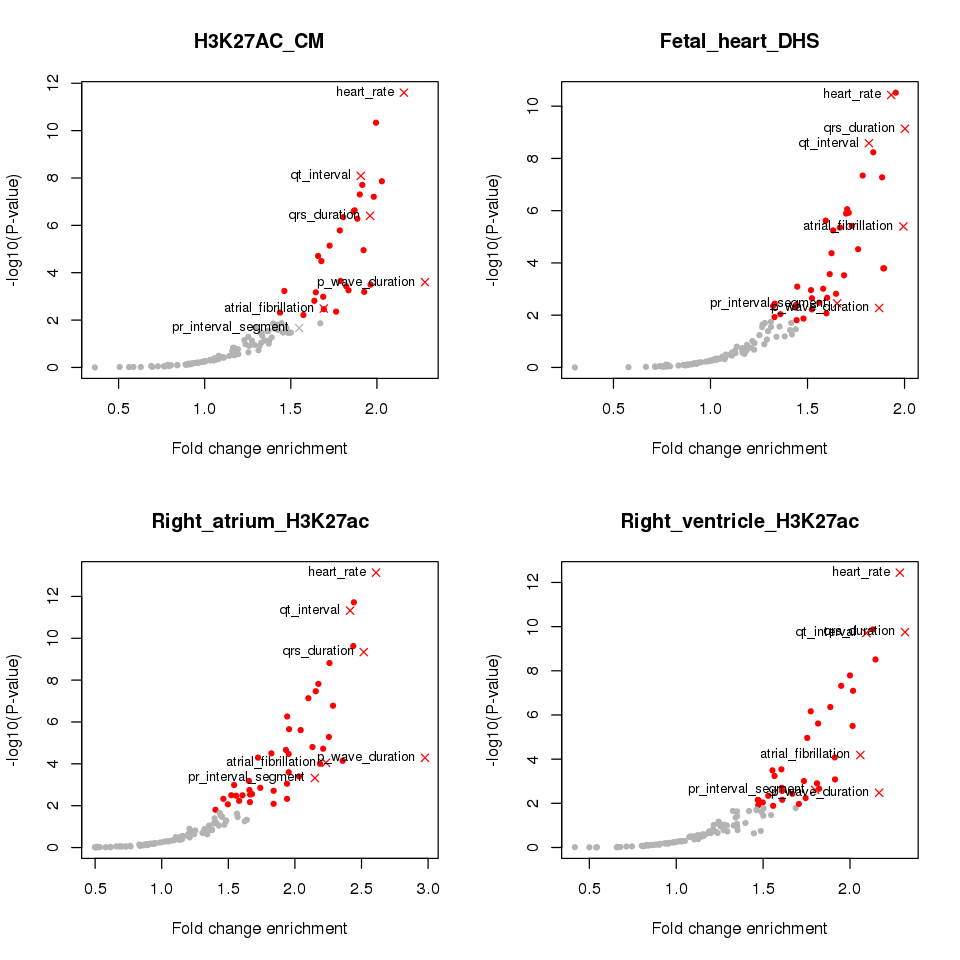

In [41]:
#pdf('/home/paola/Family1070/private_output/Figures/Enrichemnt_GWAS_volcano_plots.pdf')
options(repr.plot.width=8,repr.plot.height=8 )
par(mfrow=c(2,2))
for (x in 1:ncol(PV)){
    
pv = PV[,x]
fc = FC[,x]
    
bh =p.adjust(pv, method="BH")
    
signif = names_1
#signif[(bh>0.01)]<-NA
signif[!(signif %in% ekg)]    <-NA
plot(fc,-log(pv,10), pch=c(20,4)[(signif %in% ekg)+1] , col=c("red", "gray70")[(bh>0.05)+1], main = colnames(PV)[x], 
     xlab="Fold change enrichment", ylab="-log10(P-value)")
text(fc,-log(pv,10), labels=signif, cex =0.8, pos=2)
    }
#dev.off()